<a href="https://colab.research.google.com/github/dataarjun/GenerativeAi/blob/main/Generative_AI_Foundation_Course_%7C_DeepLearning_01_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<a id="1"></a> <br>
# <a> INTRODUCTION

## <a> Topics to be Discussed </a>

* <a> What are Neural Networks
      DeepLearning Basics & Artificial Neural Network Overview
* <a>Building the Vocabulary - Terms & Concepts
    
* <a>Training the Neural Networks
* <a>Key Types of Neural Networks -
  CNN, RNN, LSTM, GANs
       1.   CNN
       2.   RNN
       3.   LSTM
       4.   GANs

* <a>Lab(s): Working with Neural Networks


## <a> DeepLearning Basics & Artificial Neural Network Overview

## <a>1. What are Neural Networks </a>

Neural networks are a type of machine learning models which are designed to operate similar to biological neurons and human nervous system. These models are used to recognize complex patterns and relationships that exists within a labelled dataset. They have following properties:

1. The core architecture of a Neural Network model is comprised of a large number of simple processing nodes called Neurons which are interconnected and organized in different layers.

2. An individual node in a layer is connected to several other nodes in the previous and the next layer. The inputs form one layer are received and processed to generate the output which is passed to the next layer.

3. The first layer of this architecture is often named as input layer which accepts the inputs, the last layer is named as the output layer which produces the output and every other layer between input and output layer is named is hidden layers.

### Key concepts in a Neural Network

#### <a> A. Neuron:

A Neuron is a single processing unit of a Neural Network which are connected to different other neurons in the network. These connections repersents inputs and ouputs from a neuron. To each of its connections, the neuron assigns a “weight” (W) which signifies the importance the input and adds a bias (b) term.

#### <a> B. Activation Functions

The activation functions are used to apply non-linear transformation on input to map it to output. The aim of activation functions is to predict the right class of the target variable based on the input combination of variables. Some of the popular activation functions are Relu, Sigmoid, and TanH.

#### <a> C. Forward Propagation

Neural Network model goes through the process called forward propagation in which it passes the computed activation outputs in the forward direction.

$ Z = W*X + b $  
$ A = g(Z) $

- g is the activation function
- A is the activation using the input
- W is the weight associated with the input
- B is the bias associated with the node

#### <a> D. Error Computation:

The neural network learns by improving the values of weights and bias. The model computes the error in the predicted output in the final layer which is then used to make small adjustments the weights and bias. The adjustments are made such that the total error is minimized. Loss function measures the error in the final layer and cost function measures the total error of the network.

Loss = Actual_Value - Predicted_Value   

Cost = Summation (Loss)   

#### <a> E. Backward Propagation:

Neural Network model undergoes the process called backpropagation in which the error is passed to backward layers so that those layers can also improve the associated values of weights and bias. It uses the algorithm called Gradient Descent in which the error is minimized and optimal values of weights and bias are obtained. This weights and bias adjustment is done by computing the derivative of error, derivative of weights, bias and subtracting them from the original values.

<br>

## <a> 2. Implement a Neural Network - Binary Classification</a>  

Lets implement a basic neural network in python for binary classification which is used to classify if a given image is 0 or 1.  



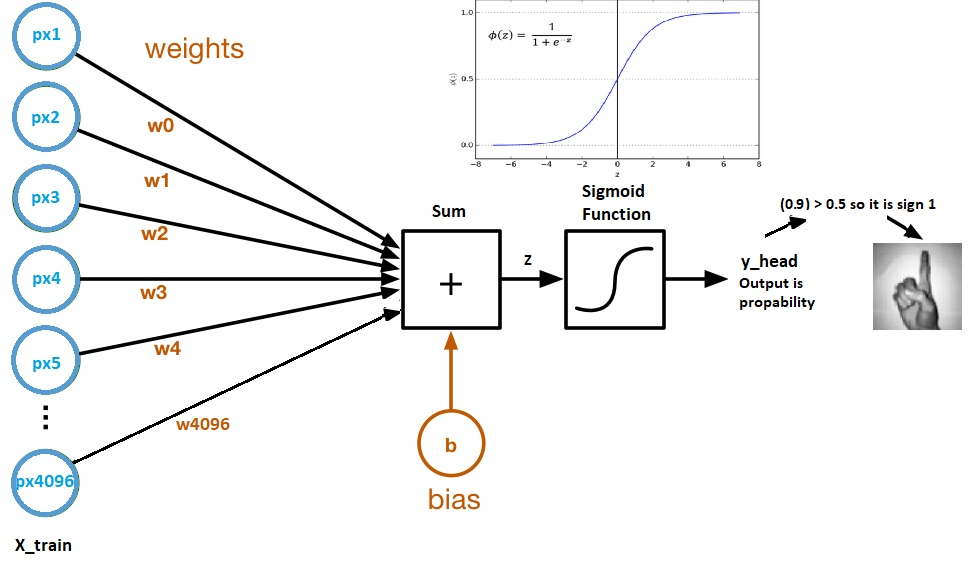






* <a> **Deep learning:** </a>
 One of the machine learning technique that learns features directly from data.
* <a> **Why deep learning:**  </a>
When the amounth of data is increased, machine learning techniques are insufficient in terms of performance and deep learning gives better performance like accuracy.
<a href="http://ibb.co/m2bxcc"><img src="http://preview.ibb.co/d3CEOH/1.png" alt="1" border="0"></a>
* <a> **What is amounth of big:** </a> It is hard to answer but intuitively 1 million sample is enough to say "big amounth of data"
* <a> **Usage fields of deep learning:** </a>Speech recognition, image classification, natural language procession (nlp) or recommendation systems
* <a> **What is difference of deep learning from machine learning:** </a>
    * Machine learning covers deep learning.
    * Features are given machine learning manually.
    * On the other hand, deep learning learns features directly from data.
<a href="http://ibb.co/f8Epqx"><img src="http://preview.ibb.co/hgpNAx/2.png" alt="2" border="0"></a>



### <a> Lab 1

## <a> Training neural networks can be very confusing! 😀

### What’s a good learning rate? How many hidden layers should your network have? Is dropout actually useful? Why are your gradients vanishing?



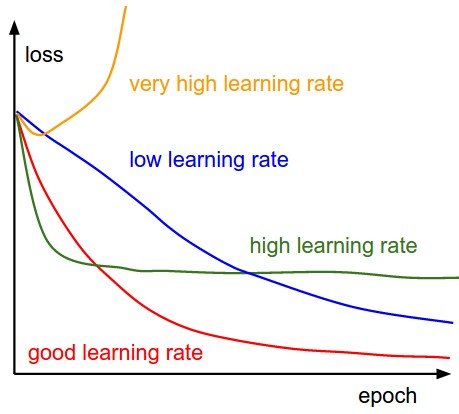

In [40]:
!pip3 install torch torchvision

In [42]:
# Import libraries
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Create test and training sets
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


# This section will shuffle our input/training data so that we have a randomized shuffle of our data and do not risk feeding data with a pattern. Anorther objective here is to send the data in batches. This is a good step to practice in order to make sure the neural network does not overfit our data. NN’s are too prone to overfitting just because of the exorbitant amount of data that is required. For each batch size, the neural network will run a back propagation for new updated weights to try and decrease loss each time.
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)


# Initialize our neural net
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()

print(net)

### Output:
### Net(
###  (fc1): Linear(in_features=784, out_features=64, bias=True)
###  (fc2): Linear(in_features=64, out_features=64, bias=True)
###  (fc3): Linear(in_features=64, out_features=64, bias=True)
###  (fc4): Linear(in_features=64, out_features=10, bias=True)
###)


# Calculate our loss
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(5): # we use 5 epochs
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.

        net.zero_grad()  # sets gradients to 0 before calculating loss.

        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm, -1 is needed to show that output can be n-dimensions. This is PyTorch exclusive syntax)

        loss = F.nll_loss(output, y)  # calc and grab the loss value

        loss.backward()  # apply this loss backwards thru the network's parameters

        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)

### Output:
### tensor(0.6039, grad_fn=)
### tensor(0.1082, grad_fn=)
### tensor(0.0194, grad_fn=)
### tensor(0.4282, grad_fn=)
### tensor(0.0063, grad_fn=)


# Get the Accuracy
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

### Output:
### Accuracy:  0.915

100%|██████████| 9912422/9912422 [00:00<00:00, 84874718.78it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 73773260.55it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 33042170.02it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12968365.40it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
tensor(0.2243, grad_fn=<NllLossBackward0>)
tensor(0.1525, grad_fn=<NllLossBackward0>)
tensor(0.0575, grad_fn=<NllLossBackward0>)
tensor(0.2184, grad_fn=<NllLossBackward0>)
tensor(0.1620, grad_fn=<NllLossBackward0>)
Accuracy:  0.919


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<br>

## <a> Deep Neural Networks - Convolutional Neural Networks </a>

Deep Neural Networks are composed of complex and many number of hidden layers which tries to extract low level features from the images. Some examples of complex deep neural networks are convolutional neural networks and Recurrent Neural Networks.

###  Convolutional Neural Networks

In Convolutional Neural Networks, every image input is treated as a a matrix of pixel values which represents the amount of darkness at a given pixel in the image. Unlike, tradational neural networks which treats an image as a one dimentional network, CNNs considers the location of pixels and the neighbours for classification.

<br>

![](http://www.mdpi.com/information/information-07-00061/article_deploy/html/images/information-07-00061-g001.png)

<br>

### Key components of Convolutional Neural Network.

**A. Convolutional layer: ** In this layer, a kernel (or weight) matrix is used to extract low level features from the images. The kernel with its weights rotates over the image matrix in a sliding window fashion in order to obtained the convolved output. The kernel matrix behaves like a filter in an image extracting particular information from the original image matrix. During the colvolution process, The weights are learnt such that the loss function is minimized.

**B. Stride: ** Stride is defined as the number of steps the kernel or the weight matrix takes while moving across the entire image moving N pixel at a time. If the weight matrix moves N pixel at a time, it is called stride of N.

![](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif)
Image Credits - www.deeplearning.net

**C. Pooling Layer:**  Pooling layers are used to extract the most informative features from the generated convolved output.

![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png)

**D. Output Layer:** To generate the final output, a dense or a fully connected layer is applied with the softmax activation function. Softmax function is used to generate the probabilities for each class of the target variable.

<br>


### <a> Create the CNN Model Architecture

In this step, create the convolutional neural network architecture with following layers:

1. Convolutional Layer with kernel size = 3*3, 32 convolutional units, and RelU activation function
2. Convolutional Layer with kernel size = 3*3, 64 convolutional units, and RelU activation function  
3. Max Pooling Layer with pooling matrix size = 2*2
4. Dropout Layer : A dropout layer is used for regularization and reducing the overfitting
5. Flatten Layer : A layer to convert the output in one dimentional array
6. Dense Layer : A dense layer is a fully connected layer in which every node is connected to every other node in the previous and next layers. In our network, it contains 128 neurons but this number can be changed for further experiments.
7. Another Dropout Layer for regularization
8. Final output layer : A dense layer with 10 neurons for generating the output class

In the simple neural network that we implemented in step 1, the loss function was LogLoss function and the optimizing Algorithm was Gradient Descent, In this neural network, we will use categorical_crossentropy as this is a multi class classification as the loss function and Adadelta as the optimizing function.

## Dataset

In [46]:
!mkdir digit-recognizer

!kaggle competitions download -c digit-recognizer
!cp digit-recognizer.zip  /content/digit-recognizer
!unzip digit-recognizer.zip -d /content/Dataset

mkdir: cannot create directory ‘digit-recognizer’: File exists
digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  digit-recognizer.zip
  inflating: /content/Dataset/sample_submission.csv  
  inflating: /content/Dataset/test.csv  
  inflating: /content/Dataset/train.csv  




```
## Example Code

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# preprocess the train data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_train /= 255

# preprocess the validation data
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_val = x_val.astype('float32')
x_val /= 255

input_shape = (img_rows, img_cols, 1)

# convert the target variable
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

# preprocess the test data
Xtest = test.as_matrix()
Xtest = Xtest.reshape(Xtest.shape[0], img_rows, img_cols, 1)



model = Sequential()

# add first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# add second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# add one max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add one dropout layer
model.add(Dropout(0.25))

# add flatten layer
model.add(Flatten())

# add dense layer
model.add(Dense(128, activation='relu'))

# add another dropout layer
model.add(Dropout(0.5))

# add dense layer
model.add(Dense(num_classes, activation='softmax'))

# complile the model and view its architecur
model.compile(loss=keras.losses.categorical_crossentropy,  optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model.summary()
```



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <a> RNN

### Before we jump into RNN math, it is important to look at the previous layer that is involved before the RNN layer.

Let's take an example:

"Welcome to the foundation course in GenerativeAi"


## <a> Step 1: Tokenization


In [33]:
## Let's take an example:
sentence = "Very warm welcome to the foundation course in GenerativeAi "
tokens = sentence.split(" ")
for word in tokens:
  print(word)

Very
warm
welcome
to
the
foundation
course
in
GenerativeAi



## <a> Step 2: Embedding layer

In NLP, we usually convert words into dense vectors that capture their semantic meaning. This is like giving each word a unique "signature".

Assuming an embedding size of 3 (just for simplicity), the word "GenerativeAi" might be represented as

In [6]:
[0.1, 0.2, 0.3]

[0.1, 0.2, 0.3]

In the real-time example, the Embedding size varies from 128 to 1024.

Now the entire "Very warm welcome to the foundation course in GenerativeAi "  sentence becomes:



```
[[0.1, 0.2, 0.3],
 [0.4, 0.5, 0.6],
 [0.7, 0.8, 0.9],
  . . .
 [0.7, 0.8, 0.9],
 [0.4, 0.5, 0.6]]

```



## Recurrent Neural Networks
In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs. You can think of the additional inputs as being concatenated to the end of the “normal” inputs to the previous layer. For example, if a hidden layer had 10 regular input nodes and 128 hidden nodes in the layer, then it would actually have 138 total inputs (assuming you are feeding the layer’s outputs into itself à la Elman) rather than into another layer). Of course, the very first time you try to compute the output of the network you’ll need to fill in those extra 128 inputs with 0s or something.
​
Source: [Quora](https://www.quora.com/What-is-a-simple-explanation-of-a-recurrent-neural-network)

​
Source: [Medium](https://medium.com/ai-journal/lstm-gru-recurrent-neural-networks-81fe2bcdf1f9)
​
Let me give you the best explanation of Recurrent Neural Networks that I found on internet: https://www.youtube.com/watch?v=UNmqTiOnRfg&t=3s

### <a> Recurrent neurons

The most basic form of RNN cell is a *recurrent neuron*. It simply sends its output back to itself.

At each time step $t$, it receives the input vector $\mathbf{x}_{(t)}$ and its own scalar output from the previous time step, $y_{(t-1)}$.

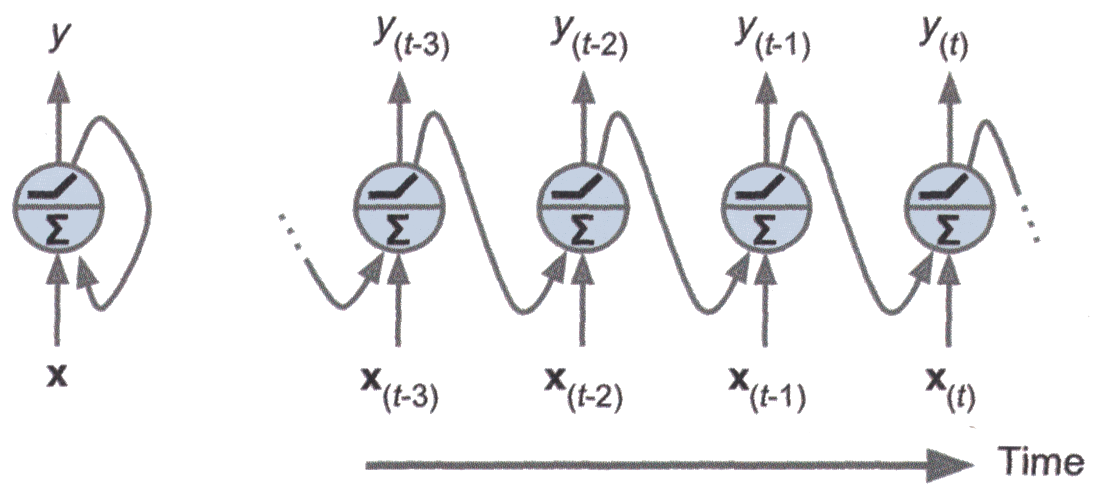

Now, even though RNNs are quite powerful, they suffer from  **Vanishing gradient problem ** which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: **Long Short Term Networks(LSTM).**

### What is Vanishing Gradient problem?
Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)

<img src="https://cdn-images-1.medium.com/max/1460/1*FWy4STsp8k0M5Yd8LifG_Q.png">

Source: [Medium](https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257)

## <a> Step 3: RNN Layer - Math Simplified

Underestanding the Notations involved in RNN:

* t: denotes the time step
* h(t): denotes the hidden state to current time step
* h(t-1): denotes the previous hidden state at time step t-1
* x(t): denotes the input at time step t.


* This is the input that is received from embedding layer. In the below example observe carefully, the shape matches with that of embedding
tanh: Is the activation function that is used to calculate the next hiddent state value i.e., h(t) in dependent to h(t-1)
The RNN processes the sequences step by step, maintaining an internal state that captures information from previous time steps.

* We need to define the hidden state size [hyperparameter]. Assume our RNN has a hidden state size of 2.

* Let's simplify the RNN math for one time step.

Given an input at time step t, denoted as x(t), and the previous hidden state at time step t-1, denoted as h(t-1), the calculations in the RNN are as follows:

## <a> How do we calculate the new hidden state and output:



The hidden state update equation in an RNN:
$h_t = \text{tanh}\left( W_{hh} \cdot h_{t-1} + W_{xh} \cdot x_t + b_h \right)$

The output equation in an RNN:
$y_t = \text{sigmoid} \left( W_{hy} \cdot h_t + b_y \right) $



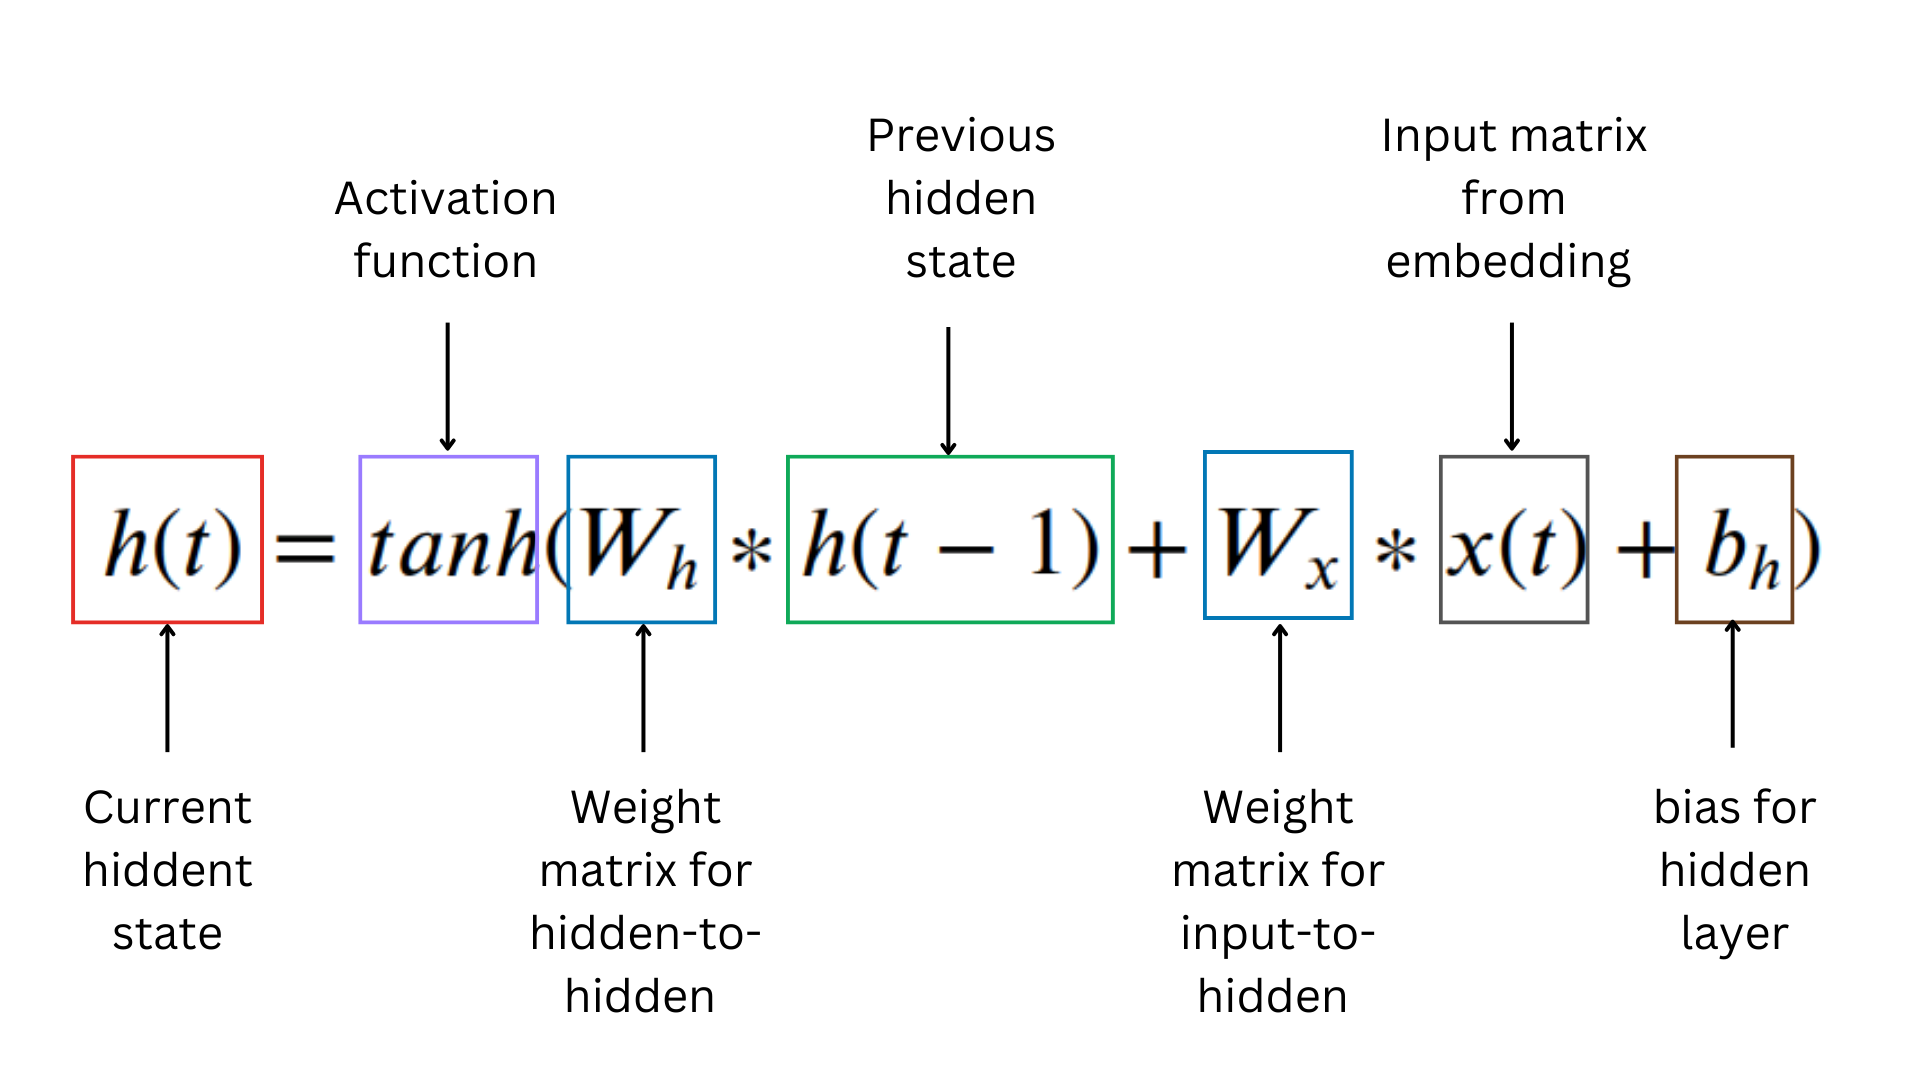

2. Initial hidden state (h(0))

```
 [0, 0]
```
Sample Python code snippet

```
 ht = np.zeros((self.hidden_size,1))
```
3. Initialize weight matrix randomly

a) : $ W_{h} $  weight matrix that defines the transformation applied to the previous hidden state $ h_{t-1} $ at each time step.



```
[[0.1, 0.2],
 [0.3, 0.4]]
```

b) : $ W_{x} $  Weight matrix that defines the transformation applied to the input data at each time step.



```
[[0.5, 0.6, 0.7],
 [0.8, 0.9, 1.0]]
```
c) : $ W_{y} $ is the weight matrix that defines the transformation applied to the hidden state h(t) to compute the output y(t) at each time step.




```
[[0.2, 0.3],
 [0.4, 0.5]]
```

Note: A kind reminder, the weights are usually initialized randomly. Also
##### notice the size of the weight matrix is 2x3 that is corresponding to hidden_size x embedding_size
---


Sample Python Code snippet




```
Wx = np.random.randn(self.hidden_size, self.input_size.shape[2])
Wh = np.random.randn(self.hidden_size, self.hidden_size)
Wy = np.random.randn(self.output_size.shape[1],self.hidden_size)
```


**Bias**

Bias for hidden state $ (b_h) $:


```
[0.1, 0.2]
```

Bias for output $(b_y)$:




```
[0.3, 0.4]
```









## <a> Step 3. Calculate the new hidden state h(1) and the output y(1) at the first time step

We have total 9 vocabulary in the Embeddings, let's just take the first word (x(1)):



```
[0.1, 0.2, 0.3]
```



Now let's Calculate the weighted sum of the previous hidden state $(h(0))$ and the input $(x(1))$ along with the bias for the hidden state: $(b(h))$:




```
weighted_sum =  W_h * h(t-1) + W_x * x(t) + b_h

weighted_sum = [[0.1, 0.2], [0.3, 0.4]] * [0, 0] +
                [[0.5, 0.6, 0.7],
                [0.8, 0.9, 1.0]] * [0.1, 0.2, 0.3] +
                [0.1, 0.2]
                
             = [0.0, 0.0] + [0.38, 0.56] + [0.1, 0.2]
             = [0.48, 0.76]
```



Let's apply tanh function and find out h(1)



```
h(1) = tanh([0.21, 0.46])
     ≈ [0.44624361, 0.64107696]

```

Let's apply sigmoid function and find out $ y(1) $

$ y(t) = sigmoid(W_y⋅h(t)+b_y) $

Calculate



```
y(1) = sigmoid([[0.2, 0.3], [0.4, 0.5]] * [0.206, 0.440] + [0.3, 0.4])
     = sigmoid([0.216, 0.355] + [0.3, 0.4])
     = sigmoid([0.516, 0.755])
     ≈ [0.61614087, 0.66871967]
```




### <a>  Lab 02

## <a> Step 4. Verification via code


In [34]:
import numpy as np

W_hXh_t_1 = np.dot(np.array([[0.1, 0.2], [0.3, 0.4]]),np.array([0, 0]))

W_xXx_t = np.dot(np.array([[0.5, 0.6, 0.7],
                [0.8, 0.9, 1.0]]),np.array([0.1, 0.2, 0.3]))

b_h = np.array([0.1, 0.2])



In [35]:
weighted_sum = W_hXh_t_1 + W_xXx_t + b_h
weighted_sum

array([0.48, 0.76])

In [36]:
h_1 = np.tanh(weighted_sum)
h_1


array([0.44624361, 0.64107696])

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [38]:
y_1 = sigmoid(
            np.dot(
                np.array([[0.2, 0.3], [0.4, 0.5]]),
                np.array([0.206, 0.440])
            )
            + np.array([0.3, 0.4])
)
y_1

array([0.61614087, 0.66871967])

## <a> Step 5. Loss Function:

The loss function measures the difference between the predicted output and the actual target output. In the context of sequence tasks like language modeling, sentiment analysis, or sequence-to-sequence tasks, a common choice for the loss function is the categorical cross-entropy loss.

$ L(t) = - sum(y_actual(t) * log(y(t))) $

Here let's say our use case is sentiment anaylsis, considering our example "AI Planet Bootcamps are free and available to all." is a positive sentiment

thus:

$ y_actual = 1 $

## <a> Step 6. Backwardpropogation through time (BPTT):

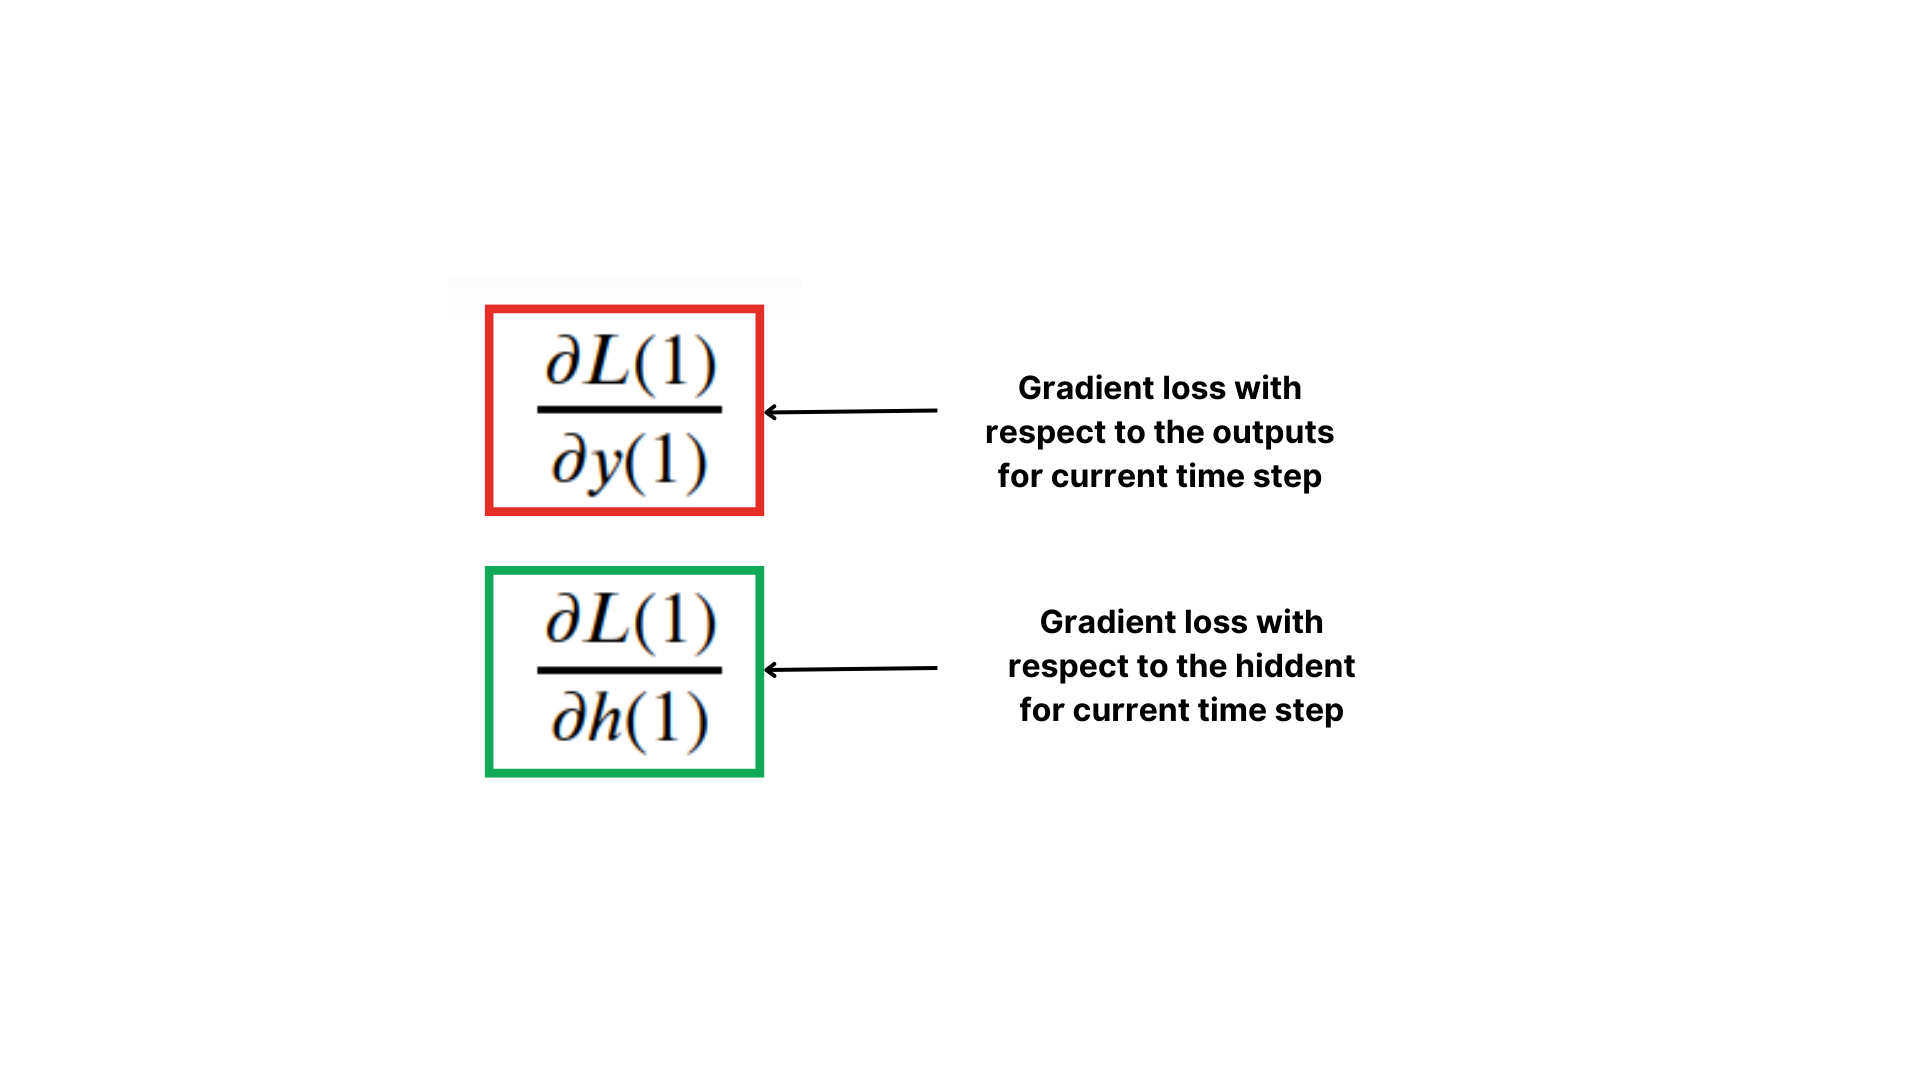

1. **Calculate Forward Pass:** First, we calculate the forward pass as described above.

2. **Calculate Loss for Each Time Step:** Next, we compute the loss for each time step using the predicted outputs $\(y(t)\)$ and the true target outputs $ \(y(\text{actual})\).$

3. **Begin Backpropagation Process:** The backpropagation process starts by computing the gradients (partial derivatives) of the loss with respect to the outputs and hidden states at the last time step $ (\(T\)).$

4. **Iterate Backward Through Time Steps:** We then iterate backward through the time steps from $\(T\) $vdown to 1. For each time step $\(t\), $ we calculate the gradients of the loss with respect to the hidden state and input at time step \(t\), and update the gradients with respect to the parameters $ (\(W_x\), \(W_h\), \(W_y\), biases, etc.). $

5. **Update Weights Using Learning Rate:** We use the learning rate to add the step size to update the weights $(\(W_x\), \(W_h\), \(W_y\))$

6. **Continue Iterating Until Convergence:** Finally, we continue iterating over mini-batches of sequences, performing both forward and backward passes, until convergence. This means reaching the end of the time steps or a specified number of epochs.


Sample Python code snippet



```
dWy = np.dot(dyt,self.hidden_states[-1].T)
dht = np.dot(dyt, self.Wy).T
dWx = np.zeros(self.Wx.shape)
dWh = np.zeros(self.Wh.shape)

for step in reversed(range(n)):
    temp = (1-self.hidden_states[step+1]**2) * dht
    dWx += np.dot(temp, self.inputs[step].T)
    dWh += np.dot(temp, self.hidden_states[step].T)
    dht = np.dot(self.Wh, temp)

#gradient clipping: this is used to tackle Exploding Gradient problem
dWy = np.clip(dWy, -1, 1)
dWx = np.clip(dWx, -1, 1)
dWh = np.clip(dWh, -1, 1)
#weights updation using learning rate(step size)
self.Wy -= self.lr * dWy
self.Wx -= self.lr * dWx
self.Wh -= self.lr * dWh
```



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <a> Long Short Term Memory(LSTM)
### LSTM cells

*Long Short-Term Memory* cells are a special kind of RNN cells, capable of learning long-term dependencies in input data. They were introduced in 1997 ([original paper](http://www.bioinf.jku.at/publications/older/2604.pdf)) and have been refined over the years.

An LSTM cell has a complex internal structure that make it able to:
- learn to recognize an important input,
- store it in the long-term state,
- preserve it for as long as it is needed,
- extract it whenever it is needed.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)



Source: [Medium](https://codeburst.io/generating-text-using-an-lstm-network-no-libraries-2dff88a3968)

The best LSTM explanation on internet: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

Refer above link for deeper insights.

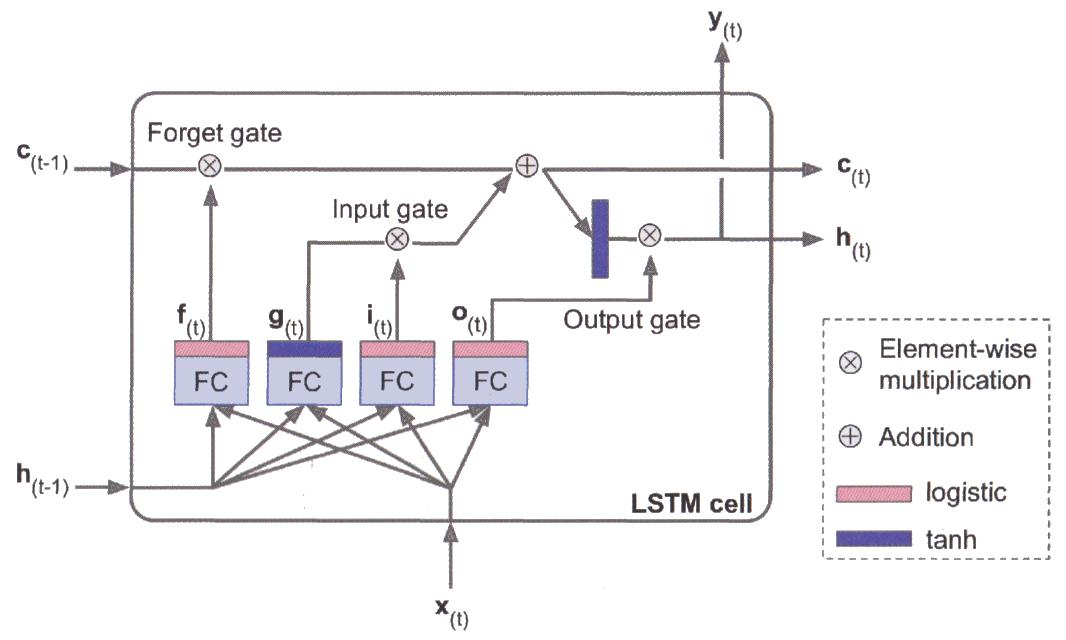

## <a> Components of LSTMs
The cell's state is split between $\mathbf{h}_{(t)}$ (*short-term state*) and $\mathbf{c}_{(t)}$ (*long-term state*).

- The layer that outputs $\pmb{g}_{(t)}$ is the main layer. In a basic RNN layer, there would be nothing else.
- The *forget gate* (controlled by $\pmb{f}_{(t)}$) controls which parts of the previous long-term state $\mathbf{c}_{(t-1)}$ should be erased.
- The *input gate* (controlled by $\pmb{i}_{(t)}$) controls which part of the main layer output should ne added to the long-term state.
- The *output gate* (controlled by $\pmb{o}_{(t)}$) controls which parts of the long-term state should be outputted at this time step.

Sigmoid-based layers output values near either 0 (gate closed) or 1 (gate open).

For more details, consult this [step-by-step LSTM walkthrough](https://colah.github.io/posts/2015-08-Understanding-LSTMs/).

## <a> Working of gates in LSTMs
First, LSTM cell takes the previous memory state C<sub>t-1</sub> and does element wise multiplication with forget gate (f) to decide if  present memory state C<sub>t</sub>. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

**C<sub>t</sub> = C<sub>t-1</sub> * f<sub>t</sub>**

Calculating the new memory state:

**C<sub>t</sub> = C<sub>t</sub> + (I<sub>t</sub> * C\`<sub>t</sub>)**

Now, we calculate the output:

**H<sub>t</sub> = tanh(C<sub>t</sub>)**

### <a> Lab 03:

### And now we get to the code...
We will use LSTMs for predicting the price of stocks of IBM for the year 2017

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [10]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

## Kaggle Dataset Import

In [18]:
!pip install kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Kaggle_API/kaggle.json' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231
!mkdir Dataset
!cp stock-time-series-20050101-to-20171231.zip /content/Dataset
!unzip stock-time-series-20050101-to-20171231.zip -d /content/Dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                   Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           8785        284  1.0              
joebeachcapital/life-longevity-factors                            Life Longevity Factors                               8KB  2023-08-23 01:01:55            568         25  1.0              
nelgiriyewithana/countries-of-the-world-2023                      Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          14693        575  1.0          

In [19]:
# First, we get the data
dataset = pd.read_csv('/content/Dataset/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

Open   High    Low  Close    Volume Name
Date                                                 
2006-01-03  82.45  82.55  80.81  82.06  11715200  IBM
2006-01-04  82.20  82.50  81.33  81.95   9840600  IBM
2006-01-05  81.40  82.90  81.00  82.50   7213500  IBM
2006-01-06  83.95  85.03  83.41  84.95   8197400  IBM
2006-01-09  84.10  84.25  83.38  83.73   6858200  IBM

In [20]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

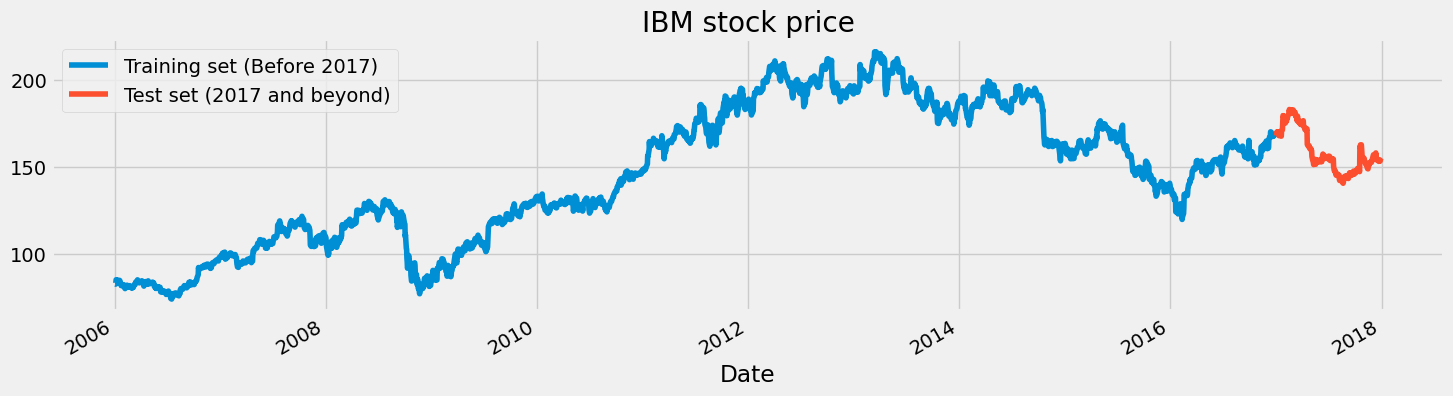

In [21]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [22]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [23]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [24]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [25]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 31s 220ms/step - loss: 0.0195
Epoch 2/50
85/85 [==============================] - 14s 159ms/step - loss: 0.0094
Epoch 3/50
85/85 [==============================] - 14s 160ms/step - loss: 0.0084
Epoch 4/50
85/85 [==============================] - 13s 154ms/step - loss: 0.0072
Epoch 5/50
85/85 [==============================] - 13s 152ms/step - loss: 0.0060
Epoch 6/50
85/85 [==============================] - 13s 151ms/step - loss: 0.0054
Epoch 7/50
85/85 [==============================] - 14s 161ms/step - loss: 0.0051
Epoch 8/50
85/85 [==============================] - 13s 152ms/step - loss: 0.0048
Epoch 9/50
85/85 [==============================] - 12s 140ms/step - loss: 0.0045
Epoch 10/50
85/85 [==============================] - 16s 190ms/step - loss: 0.0041
Epoch 11/50
85/85 [==============================] - 12s 139ms/step - loss: 0.0038
Epoch 12/50
85/85 [==============================] - 13s 149ms/step - loss: 0.0036
Epoch 13/50
8

In [26]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [27]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 3s 38ms/step


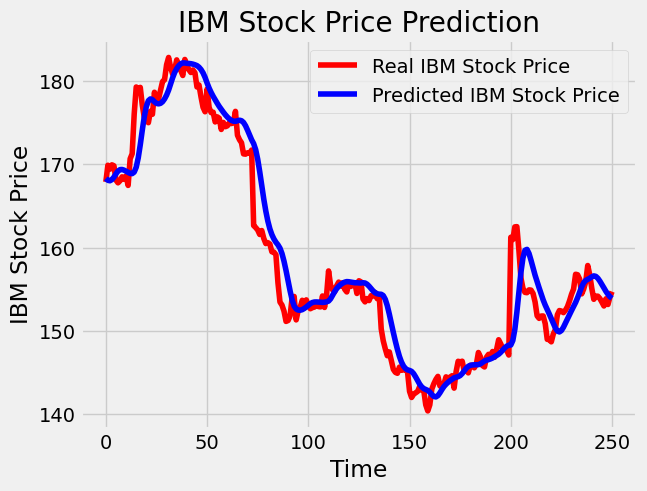

In [28]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [29]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 3.041498916562637.


Truth be told. That's one awesome score.

LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have **Gated Recurrent Units(GRU)**. It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

## Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)


---



---

# <a> Generative Adversarial Networks (GANs)

## <a> A. Introduction
​
GANs are one of the most exciting advancements in machine learning in recent years. They have shown remarkable results in a variety of applications such as image synthesis, super-resolution, and image-to-image translation.
​
This notebook aims to introduce you to the fundamental concepts of GANs, guide you through the necessary steps to grasp the GAN framework, and provide hands-on experience with the implementation of a GAN model. By the end of this guide, you will understand:
​
- <a> What GANs are and the theory behind them.
- How to implement a basic GAN model.
- How to train a GAN model.
- The limitations and challenges of GANs.</a>



---



---


## <a> B. Background and Theory

GANs, short for Generative Adversarial Networks, are a class of machine learning frameworks introduced by [Ian Goodfellow and his colleagues in 2014](https://papers.nips.cc/paper_files/paper/2014/hash/5ca3e9b122f61f8f06494c97b1afccf3-Abstract.html). They are designed to generate new, synthetic instances of data that can pass for real, existing instances.

### <a> B 2.1  Intuition behind GAN

GANs consist of two parts:

<a> **Generator:**</a>  This is the "counterfeiter," tasked with creating fake data. The generator takes random noise as input and generates data (e.g., an image) as output.

<a> **Discriminator:**</a> This is the "police," trying to distinguish the fake data from real data. It is a binary classifier that outputs the probability that the given input comes from the real dataset rather than the generator.



An intuitive way to understand GANs is to imagine a forger trying to create a fake **Picasso painting**.

* At first, the forger is pretty bad at the task. He mixes some of his fakes with authentic Picassos and shows them all to an art dealer.
* The art dealer makes an authenticity assessment for each painting and gives the forger feedback about what makes a Picasso look like a Picasso.
* The forger goes back to his studio to prepare some new fakes. As times goes on, the forger becomes increasingly competent at imitating the style of Picasso, and the art dealer becomes increasingly expert at spotting fakes.
* In the end, they have on their hands some excellent fake Picassos.

That’s what a GAN is: a **forger network** and an **expert network**, each being trained to best the other. As such, a GAN is made of two parts:
* **1. Generator network**—Takes as input a random vector (a random point in the latent space), and decodes it into a synthetic image.
* **2. Discriminator network (or adversary)**—Takes as input an image (real or synthetic), and predicts whether the image came from the training set or was created by the generator network.

The generator network is trained to be able to fool the discriminator network, and thus it evolves toward generating increasingly realistic images as training goes on: artificial images that look indistinguishable from real ones, to the extent that it’s impossible for the discriminator network to tell the two apart. Meanwhile, the discriminator is constantly adapting to the gradually improving capabilities of the generator, setting a high bar of realism for the generated images. Once training is over, the generator is capable of turning any point in its input space into a believable image.

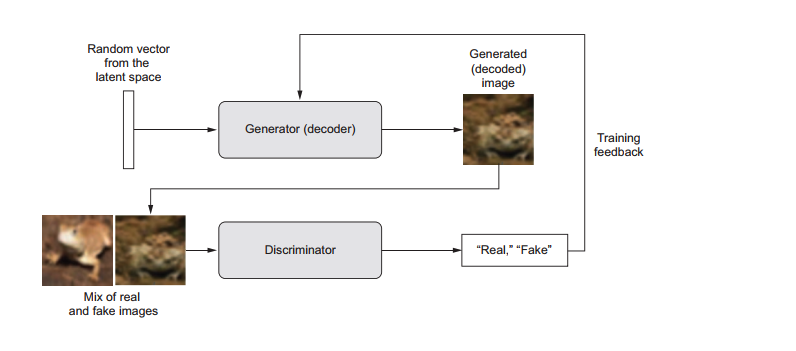

Remarkably, a GAN is a system where the optimization minimum isn’t fixed. Normally, gradient descent consists of rolling down hills in a static loss landscape. But with a GAN, every step taken down the hill changes the entire landscape a little. It’s a dynamic system where the optimization process is seeking not a minimum, but an equilibrium between two forces. For this reason, GANs are notoriously difficult to train.



Of course, GANs require finding the equilibrium in a game with two players. For effective learning it is required that if a player successfully moves downhill in a round of updates, the same update must move the other player downhill too. Think about it! If the forger learns how to fool the judge on every occasion, then the forger himself has nothing more to learn. Sometimes the two players eventually reach an equilibrium, but this is not always guaranteed and the two players can continue playing for a long time. An example of learning from both sides has been provided in the following graph:

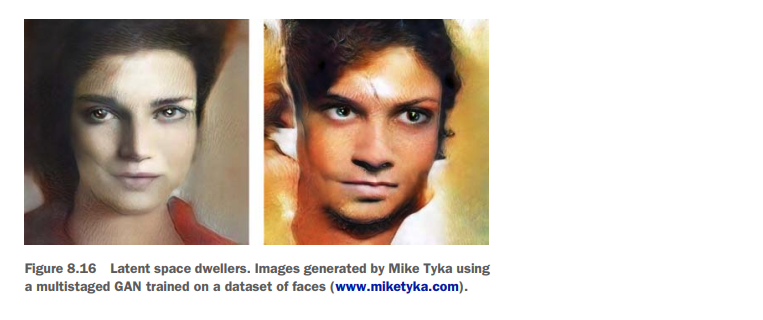


### <a> B 2.2 Architecture of GANs

The generator and discriminator are set up to play a two-player minimax game, in which the generator tries to fool the discriminator, and the discriminator tries to not get fooled. This process can be summarized as follows:

1. The generator creates a batch of fake data.
2. The fake data, along with real data, are given to the discriminator.
3. The discriminator classifies the data as real or fake.
4. Both the generator and discriminator learn from their mistakes and adjust for the next round.

This adversarial process leads the generator to produce increasingly realistic data, while the discriminator becomes better at distinguishing fake data. Over time, the generator can produce data that's almost indistinguishable from the real data.

### <a> B 2.3 Understanding the Loss Function

The loss function of a GAN reflects the adversarial relationship between the generator and the discriminator. The generator aims to minimize this function, while the discriminator aims to maximize it. This is the essence of the minimax game played between the two.

Mathematically, the value function $V$ for a simple GAN can be written as:

$$\min_G \max_D V(D, G) = \mathbb{E}_{x\sim p_{data}(x)}[\log D(x)] + \mathbb{E}_{z\sim p_z(z)}[\log(1-D(G(z)))]$$

where:
- `G` is the generator function, which maps from the latent space to the feature (data) space.
- `D` is the discriminator function, which outputs the probability that the data came from the real dataset.
- `z` is a random prior, a point in the latent space, which is the input that the generator uses to generate a fake sample.
- `x` is a point in the feature (data) space.

The first term in the equation is the expectation of the log-probability that the discriminator correctly classifies a real instance as real. The second term is the expectation of the log-probability that the discriminator correctly classifies a fake (generated) instance as fake.

As the generator's goal is to fool the discriminator, it tries to maximize the probability that the discriminator incorrectly classifies a fake instance as real, hence it aims to minimize `log(1 - D(G(z)))`. On the other hand, the discriminator tries to correctly classify both real and fake instances, hence it aims to maximize both `log(D(x))` and `log(1 - D(G(z)))`.

In practice, the generator minimizes the negative of this loss function, which is equivalent to maximizing the probability that the discriminator incorrectly classifies a fake instance as real.

Through this process, both the generator and the discriminator improve their ability to generate realistic data and distinguish between real and fake data, respectively.

## <a> C. Setting up the Environment <a class='anchor' id='section3'></a>

Now that you have a rough understanding of how GANs work, let's implement them. For the implementation, we need a couple of libraries.

## <a> C 1.0 Lab 04

In [1]:
!pip install numpy matplotlib torch torchvision tqdm

In [2]:
# Check if everything is downloaded correctly
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import datasets
from tqdm import tqdm

print("Loaded all libraries successfully!")

Loaded all libraries successfully!


In [3]:
# If there is a GPU available, using it will significantly speed up the training process.
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Running on: ", DEVICE)

Running on:  cuda


## <a> C 2.0  Dataset Introduction and Preparation

We will be using the [MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html) dataset throughout this notebook. This dataset is easily accessible through the torchvision library.

In [4]:
# Download the MNIST dataset.
mnist_dataset = datasets.MNIST(root='./.data/mnist_data/', train=True, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 302212757.37it/s]

Extracting ./.data/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./.data/mnist_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 13829854.30it/s]


Extracting ./.data/mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./.data/mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 132465502.05it/s]

Extracting ./.data/mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/mnist_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17493598.50it/s]

Extracting ./.data/mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/mnist_data/MNIST/raw



Dataset shape:  torch.Size([60000, 28, 28])


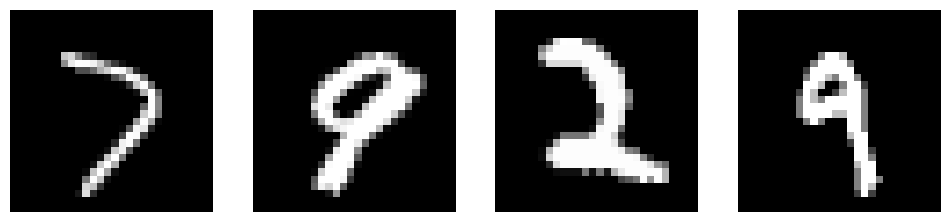

In [5]:
# The training data consists of 60.000 samples, each of 28 by 28 pixels.
print("Dataset shape: ", mnist_dataset.data.shape)

def plot_5(batch):
    indices = np.random.choice(batch.shape[0], size=4, replace=False)

    fig, axes = plt.subplots(1, 4, figsize=(12, 3))

    for i, idx in enumerate(indices):
        image = batch[idx]
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')

    plt.show()

plot_5(mnist_dataset.data)

### <a> C 3.0 Preprocessing

Before we can use the MNIST dataset for training our GAN, we need to preprocess the images. This preprocessing involves three main steps: casting the images to floats, normalizing the images and reshaping them into 1D tensors.

**Casting:** By default, the MNIST data consists of integers. Before we can normalize the data, we need to turn the datatype into floats.

**Normalization:** The pixel intensities in the MNIST images are originally in the range of 0 to 255. We normalize these intensities to be in the range [-1, 1]. Normalization helps to stabilize the training process and makes the output of the generator easier to interpret.

**Reshaping:** Since we are going to use a simple GAN with multi-layer perceptrons, we need to flatten each image, which is originally a 2D tensor (28x28), into a 1D tensor (of size 784). This is because multi-layer perceptrons accept input data in a flat, vectorized form.

In [6]:
def preprocess_dataset(dataset):
    # Casting
    dataset = dataset.float()

    # Normalization
    dataset = ((dataset / 255) * 2) - 1

    # Reshaping
    dataset = dataset.reshape(dataset.shape[0], -1)

    return dataset

preprocessed_dataset = preprocess_dataset(mnist_dataset.data)
feature_dim = preprocessed_dataset.shape[-1]

print("Example of batch:")
print(preprocessed_dataset)

print("\nFeature space size:")
print(feature_dim)

Example of batch:
tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

Feature space size:
784


### <a> C 4.0 Initializing a dataloader

Now that the data is preprocessed, it can be loaded into a dataloader for easy retrieval. To initialize a dataloader, we will need to provide a batch size. For now, lets use a batch size of $128$

In [7]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader = DataLoader(dataset=preprocessed_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

## <a> C 5. Implementing a Basic GAN <a class='anchor' id='section5'></a>

Having prepared our dataset, we're now ready to implement a basic GAN. In this section, we will define the generator and discriminator networks using [multi-layer perceptrons](https://www.wikiwand.com/en/Multilayer_perceptron). Each network will be implemented as a separate Python class using PyTorch, a popular deep learning library.

### <a> C 5.1 Defining the Generator </a>

The generator network takes as input a random noise vector (latent vector) and transforms it into a 1D tensor that resembles our flattened MNIST images. The generator network typically includes several fully connected layers, and we'll use the [LeakyReLU](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html) activation function for all layers except for the last one, where we'll use the [Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html) function to output values in the range [-1, 1], matching our normalized MNIST images.

In [8]:
from torch import Tensor


class Generator(nn.Module):
    """
    A basic implementation for a generator network.

    This generator implementation uses a standard multi-layer perceptron (MLP).
    """

    def __init__(
            self,
            input_size: int,
            output_size: int,
            dropout: float,
            leaky_relu_slope: float,
    ):
        """
        The initialization function for the generator.

        :param input_size:          The input size of the generator. This should be equal to the size of the random prior.
        :param output_size:         The output size of the generator. This should be equal to the size of the feature space.
        :param dropout:             The dropout rate.
        :param leaky_relu_slope:    The slope of the leaky ReLU activation function.
        """
        super().__init__()

        # Initialize the sequential multi-layer perceptron model using the given parameters.
        self.sequential_model = nn.Sequential(
            nn.Linear(in_features=input_size, out_features=256),
            nn.Dropout(p=dropout, inplace=True),
            nn.LeakyReLU(negative_slope=leaky_relu_slope, inplace=True),

            nn.Linear(in_features=256, out_features=512),
            nn.Dropout(p=dropout, inplace=True),
            nn.LeakyReLU(negative_slope=leaky_relu_slope, inplace=True),

            nn.Linear(in_features=512, out_features=1024),
            nn.Dropout(p=dropout, inplace=True),
            nn.LeakyReLU(negative_slope=leaky_relu_slope, inplace=True),

            nn.Linear(in_features=1024, out_features=output_size),
            # Final Tanh activation function to force all outputs to be in the range [-1, 1]
            nn.Tanh()
        )

    def forward(self, batch: Tensor) -> Tensor:
        """
        A function that generates fake samples for a batch of priors.

        :param batch:   A batch of priors (random tensors).
        :return:        A batch of fake samples.
        """
        return self.sequential_model(batch)

### <a> C 5.2 Defining the Discriminator </a>

The discriminator network takes as input a 1D tensor that could either be a real MNIST image or a fake image produced by the generator. It outputs a single scalar between 0 and 1, representing its confidence that the image is real. The discriminator network also typically includes several fully connected layers. We'll use the [LeakyReLU](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html) activation function for these layers, and the [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) function for the last layer to output a probability.

In [9]:
class Discriminator(nn.Module):
    """
    A basic implementation for a discriminator network.

    This discriminator implementation uses a standard multi-layer perceptron (MLP).
    """

    def __init__(
            self,
            input_size: int,
            dropout: float,
            leaky_relu_slope: float
    ):
        """
        The initialization function for the discriminator.

        :param input_size:              The input size of the discriminator. This should be equal to the size of the feature space.
        :param dropout:                 The dropout rate.
        :param leaky_relu_slope:        The slope of the leaky ReLU activation function.
        """
        super().__init__()

        # Initialize the sequential multi-layer perceptron model using the given parameters.
        self.sequential_model = nn.Sequential(
            nn.Linear(in_features=input_size, out_features=128),
            nn.Dropout(p=dropout, inplace=True),
            nn.LeakyReLU(negative_slope=leaky_relu_slope, inplace=True),

            nn.Linear(in_features=128, out_features=128),
            nn.Dropout(p=dropout, inplace=True),
            nn.LeakyReLU(negative_slope=leaky_relu_slope, inplace=True),

            nn.Linear(in_features=128, out_features=1)
        )

    def forward(self, batch: Tensor) -> Tensor:
        """
        A function that computes the output of the discriminator for one batch of data.

        :param batch:       The batch (2d Tensor) to compute the output for
        :return:            The output (2d Tensor)
        """
        return torch.sigmoid(self.sequential_model(batch))

## <a>  C 6. Training the GAN <a class='anchor' id='section6'></a>

Now that we have implemented our basic GAN, the next step is to train it. Training a GAN involves an iterative process where the generator and discriminator improve together over time.

### <a>  C 6.1 Training Procedure

The training procedure for a GAN generally follows these steps:

1.<a>  **Train the Discriminator:** </a> First, we train the discriminator by feeding it a batch of real images from the MNIST dataset and a batch of fake images generated by the generator. We calculate the loss for each and backpropagate to update the discriminator's weights.

2. <a>  **Train the Generator:** </a> Next, we train the generator. We generate a batch of fake images and pass them through the discriminator. However, this time we calculate the loss based on how well the generator was able to "fool" the discriminator - that is, how many fake images were classified by the discriminator as real. We backpropagate this loss to update the generator's weights.

3. <a>  **Repeat:** </a> We repeat these steps for a number of epochs, alternating between training the discriminator and the generator.

## <a> C 6.2 Training the Discriminator

The discriminator's job is to get better at distinguishing between real and fake data. During the training of the discriminator, we keep the weights of the generator constant.

Here are the steps involved:

1. <a> **Classify Real Data:** </a>We first pass a batch of real data from the MNIST dataset through the discriminator. We compare the output of the discriminator (probability that the data is real) to an array of ones (since the data is indeed real).

2. <a> **Generate and Classify Fake Data:** </a>Next, the generator creates a batch of fake data from random noise vectors. The discriminator then classifies this fake data. This time, we compare the discriminator's output to an array of zeros (since the data is fake).

3. <a> **Compute Loss:**</a> We compute two losses: one for the real data and one for the fake data, and we add them together. This combined loss represents the discriminator's ability to correctly classify both real and fake data.

4. <a> **Backpropagate:** </a>We compute the gradients and backpropagate them through the discriminator network.

5.<a>  **Update Discriminator's Weights:**</a>Using these gradients and the learning rate, we update the discriminator's weights.

By following these steps, the discriminator learns to more accurately distinguish between real and fake data. We typically use an optimization algorithm like Adam for this step.

In [10]:
from torch.optim import Optimizer
from typing import Callable


def train_discriminator(
        generator: nn.Module,
        discriminator: nn.Module,
        batch_of_real_data: Tensor,
        discriminator_optimizer: Optimizer,
        prior_generation_function: Callable[[int, int], Tensor],
    ) -> float:
    """
    A function that trains the discriminator for one batch of data.

    :return:        The discriminator loss.
    """
    # Reset gradients of discriminator optimizer
    discriminator_optimizer.zero_grad()

    # 1. Get batch of data, and discriminate that data.
    discriminator_output_real = discriminator(batch_of_real_data)

    # 2. Generate prior, generate samples using that prior, and then discriminate the generated samples
    prior = prior_generation_function(batch_size, prior_size).to(DEVICE)
    generator_output = generator(prior)
    discriminator_output_fake = discriminator(generator_output)

    # 3. Compute total loss
    discriminator_loss = nn.BCELoss()(discriminator_output_real, torch.full_like(discriminator_output_real, 1)) + \
                         nn.BCELoss()(discriminator_output_fake, torch.full_like(discriminator_output_fake, 0))

    # 4, 5. Back propagate loss and update weights
    discriminator_loss.backward()
    discriminator_optimizer.step()

    # Return loss
    return discriminator_loss.data.item()

## <a> C 6.3 Training the Generator

The training goal of the generator is to generate data that the discriminator will incorrectly classify as real. During the training of the generator, we keep the weights of the discriminator constant.

Here is the step-by-step procedure:

1. <a> **Generate a Prior:** </a> Generate random noise vectors (priors) that can be used to generate the fake data.

2. <a> **Generate Fake Data:** The generator creates a batch of fake data from random noise vectors.

3. <a>  **Classify Fake Data:** </a> The discriminator classifies the fake data. We want the discriminator to believe that this data is real, so we compare the discriminator's output to an array of ones.

4. <a>  **Compute Loss:** </a> We calculate the loss for the generator based on how well it was able to fool the discriminator. The generator's goal is to minimize this loss.

5. <a>  **Backpropagate:** </a> The gradients are computed and backpropagated through the generator network.

6. <a>  **Update Generator's Weights:**</a> The generator's weights are then updated using these gradients and the learning rate. Again, we typically use an optimization algorithm like Adam for this step.


In [11]:
def train_generator(
        generator: nn.Module,
        discriminator: nn.Module,
        generator_optimizer: Optimizer,
        prior_generation_function: Callable[[int, int], Tensor],
    ) -> float:
    """
    A function that trains the generator for one batch of data.

    :return:        The generator loss.
    """
    # Reset gradients of generator optimizer
    generator_optimizer.zero_grad()

    # 1. Generate prior
    prior: Tensor = prior_generation_function(batch_size, prior_size).to(DEVICE)

    # 2, 3. Generate and discriminate data points
    generator_output: Tensor = generator(prior)
    discriminator_output: Tensor = discriminator(generator_output)

    # 4. Calculate the loss
    generator_loss: Tensor = nn.BCELoss()(discriminator_output, torch.full_like(discriminator_output, 1))

    # 5, 6. Back propagate and update weights
    generator_loss.backward()
    generator_optimizer.step()

    # Return loss
    return generator_loss.data.item()

## <a>  C 6.4 The Training Loop

Having described the steps to train the generator and the discriminator, we can now combine these into a complete training loop.

First we need to set a couple of hyperparameters, define the optimizers for our generator and discriminator, and intialize 2 empty lists to keep track of our generator and discriminator losses.

In [12]:
# Setting hyperparameters
n_epochs = 100000           # The number of epochs we want to run for
n_discriminator = 1         # The number of iterations to run our discriminator for each epoch
n_generator = 1             # The number of iterations to run our generator for each epoch
learning_rate = 0.00005     # The learning rate for our optimizers

prior_size = 100
dropout = 0.2
leaky_relu_slope = 0.2

generator_instance = Generator(prior_size, feature_dim, dropout, leaky_relu_slope).to(DEVICE)
discriminator_instance = Discriminator(feature_dim, dropout, leaky_relu_slope).to(DEVICE)

generator_optimizer_instance = torch.optim.Adam(generator_instance.parameters(), lr=learning_rate)
discriminator_optimizer_instance = torch.optim.Adam(discriminator_instance.parameters(), lr=learning_rate)

d_losses = []
g_losses = []

As we have not yet defined how we are going to generate our random noise priors, we need to do that now. Usually, noise priors are simply generated from a [standard normal distribution](https://www.wikiwand.com/en/Normal_distribution), which we can easily do with `torch.randn()`.

In [13]:
def generate_2d_normal_prior(n_to_generate: int, p_size: int) -> Tensor:
    """
    :param n_to_generate:   The number of priors to generate.
    :param p_size:          The size of each prior.
    :return:                A batch of random priors of shape (n_to_generate, p_size)
    """
    return torch.randn(n_to_generate, p_size)

In addition, it is nice to have easily accessible batches without constantly having to re-instantiate a loop over the dataloader. We can define the following simple function which allows us to infinitely call `next(data_iterator)` to receive a new batch of data.

In [14]:
from typing import Iterator

def inf_batches(dataloader_to_loop) -> Iterator[Tensor]:
    """ A function that returns an iterator (generator) object for batches of data. """
    while True:
        for batch_of_real_data in dataloader_to_loop:
            yield batch_of_real_data.to(DEVICE)

data_iterator = inf_batches(dataloader)

**Now lets finally define our training loop.** Running the loop for 100.000 epochs with all the preset parameters takes about 15 minutes on a Google Colab with a GPU runtime environment enabled.


In [15]:
TQDM_BAR_FORMAT = '[{elapsed}<{remaining},{rate_fmt}{postfix}]{percentage:3.0f}%|{bar:10}{desc}'

generator_instance.train()
discriminator_instance.train()

# Loop for n_epochs
for epoch in (pbar := tqdm(range(1, n_epochs + 1), bar_format=TQDM_BAR_FORMAT, position=0, leave=True)):
    d_losses_epoch, g_losses_epoch = [], []

    # Train generator for n_generator iterations
    for _ in range(n_generator):
        g_losses_epoch.append(train_generator(generator_instance, discriminator_instance,
                                              generator_optimizer_instance, generate_2d_normal_prior))

    # Train discriminator for n_discriminator iterations
    for _ in range(n_discriminator):
        batch_of_data = next(data_iterator)
        d_losses_epoch.append(train_discriminator(generator_instance, discriminator_instance, batch_of_data,
                                                  discriminator_optimizer_instance, generate_2d_normal_prior))

    # Store and log losses
    d_losses.append(float(torch.mean(torch.FloatTensor(d_losses_epoch))))
    g_losses.append(float(torch.mean(torch.FloatTensor(g_losses_epoch))))

    if epoch % 200 == 0:
        pbar.set_description_str('[%d/%d]: Generator loss: %.3f, Discriminator loss: %.3f' %
                                (epoch, n_epochs, float(g_losses[-1]), float(d_losses[-1])))

[17:31<00:00,95.13it/s]100%|██████████[100000/100000]: Generator loss: 0.742, Discriminator loss: 1.331 


What was the outcome of hours of training ?
As we can see in the output of our training cell, we got brand new handwritten images by training this GAN. The most important thing to note here is that these newly formed images are NOT COPIED from the actual dataset (as ensured by our detective, the Discriminator ).

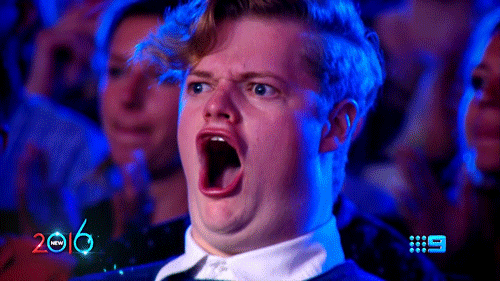

## <a> C 6.5 Evaluate the Performance

We can evaluate the performance of GANs in many ways:
1. <a> **Losses**:</a> We can look at the training losses. Unfortunately, it is very hard to interpret the progression of the training losses and it is not always indicative of good/bad fitting models.
2. <a> **Inspecting synthetic points**:  </a> We can use the generator to generate several fake samples, and visualize those samples to see if the model is training properly.
3. <a>**Metrics**: </a> here is an entire research stream within GAN research that focuses on finding the best metrics.

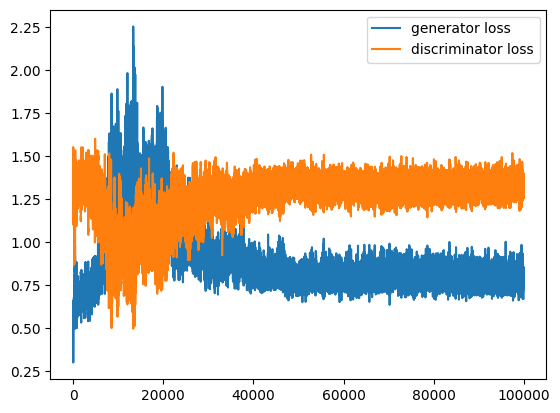

In [16]:
# 1. Plot loss graphs
plt.plot(g_losses, label="generator loss")
plt.plot(d_losses, label="discriminator loss")
plt.legend()

In [17]:
# 2. Visualize synthetic samples
# 2.1 Generate synthetic samples
number_of_samples_to_generate = 50

def generate_n_samples(n_to_generate, generator, prior_generation_function):
    with torch.no_grad():
        # Generate prior
        prior: Tensor = prior_generation_function(n_to_generate, prior_size).to(DEVICE)

        # Generate samples
        generator_output = generator(prior)

    # Return samples
    return generator_output

synthetic_samples = generate_n_samples(number_of_samples_to_generate, generator_instance, generate_2d_normal_prior).cpu()\
    .reshape(number_of_samples_to_generate, 28, 28)

## <a> C 7. Limitations of GANs </a>

While GANs are powerful tools for generating realistic synthetic data, they do come with their own set of limitations. Understanding these limitations can help in effectively applying GANs and in pursuing future research directions. Here are a few key ones:

1. <a> **Mode Collapse:** </a>This happens when the generator starts producing the same output (or minor variations) over and over again, instead of generating diverse samples. It's a common issue in GAN training due to the dynamic nature of the adversarial process ([read more](https://machinelearning.wtf/terms/mode-collapse/)).

2. <a> **Training Stability:** </a>GANs are notoriously hard to train. The simultaneous training of two networks (generator and discriminator) in an adversarial setup leads to a highly dynamic and unstable process. The networks may oscillate, and it might take a while to reach an equilibrium.

3. <a> **Lack of Explicit Control:**</a> In a basic GAN setup, there's no way to control the kind of output the generator produces. It may be possible to guide the generation process by conditioning the generator with additional information, but this requires modifications to the basic GAN architecture.

4. <a> **Evaluation Difficulty:** </a>It's challenging to measure the quality and diversity of the samples generated by GANs. Commonly used metrics, like Inception Score and Frechet Inception Distance, have their own limitations and biases.

## <a> C 8. Homework </a>

**Read the original GAN paper:** If you have never done so, now is a great time to read the [original GAN paper](https://papers.nips.cc/paper_files/paper/2014/hash/5ca3e9b122f61f8f06494c97b1afccf3-Abstract.html). You now have a good intuition of how GANs work, so getting through the paper that originally introduced them should be much easier now!


<a> **Implement a Different Type of GAN:**</a> Try implementing a more advanced type of GAN. These GANs offer additional features and capabilities beyond the basic GAN implemented in this notebook. Types of GANs you can consider implementing:
    <p> - [Deep Convolutional GAN (DCGAN)](https://arxiv.org/abs/1511.06434): Drastically improves the quality of GANs for image generation by using convolutional layers.</p>
     <p>- [Conditional GAN (CGAN)](https://arxiv.org/abs/1411.1784): CGAN allows you to choose what class of sample to generate (i.e. I want to generate a 5).</p>
     <p>- [Wasserstein GAN (WGAN)](https://arxiv.org/abs/1701.07875): More technical paper which goes into decreasing the chance of mode-collapse by using a different loss function. The implementation change is only 10 lines of code.</p>
     <p>- [CycleGAN](https://arxiv.org/pdf/1703.10593.pdf): A highly successful paper introducing GANs for image-to-image translation tasks. Just look at the images in the paper to see all that is possible!</p>


## <a> C 9.0 GAN — Some cool applications of GAN


## Image generation


We make impressive progress in the first few years of GAN developments. No more stamp-size facial pictures like those in horror movies. In 2017, GAN produced 1024 × 1024 images that can fool a talent scout.



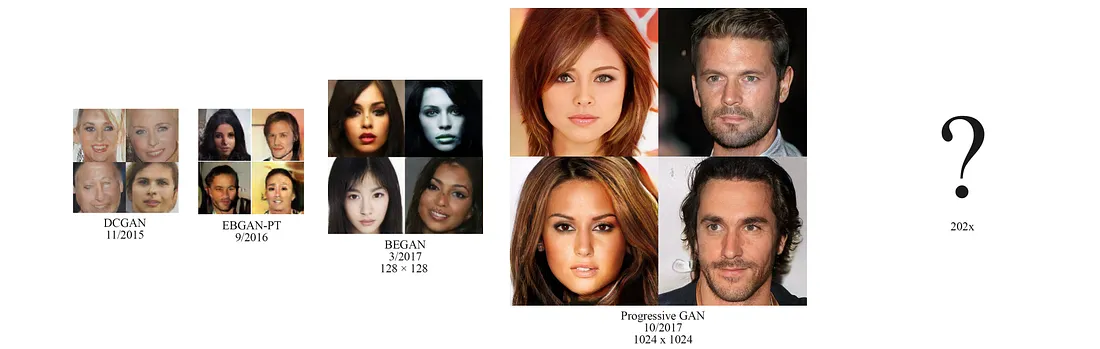

## Create Anime characters



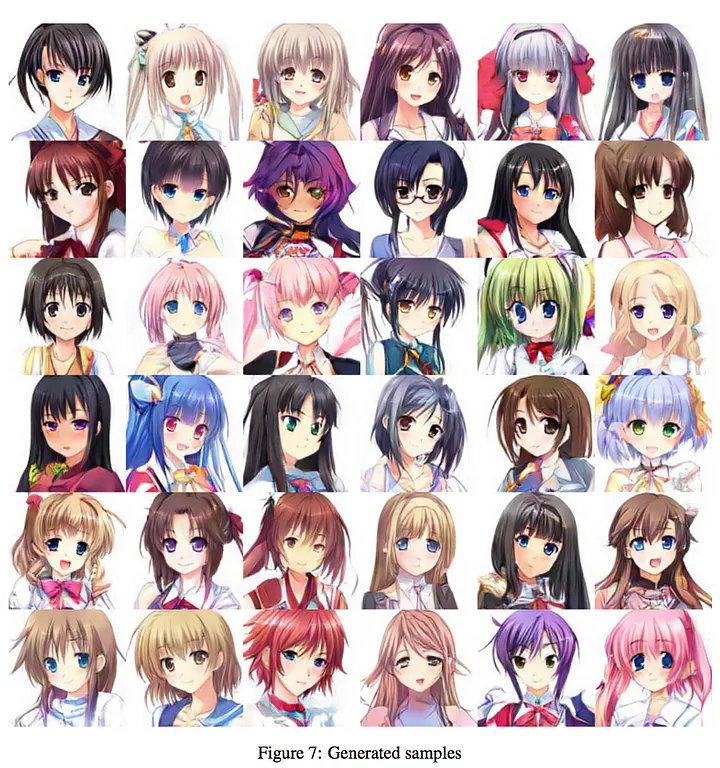

The generator and the discriminator composes of many layers of convolutional layers, batch normalization and ReLU with skip connections.

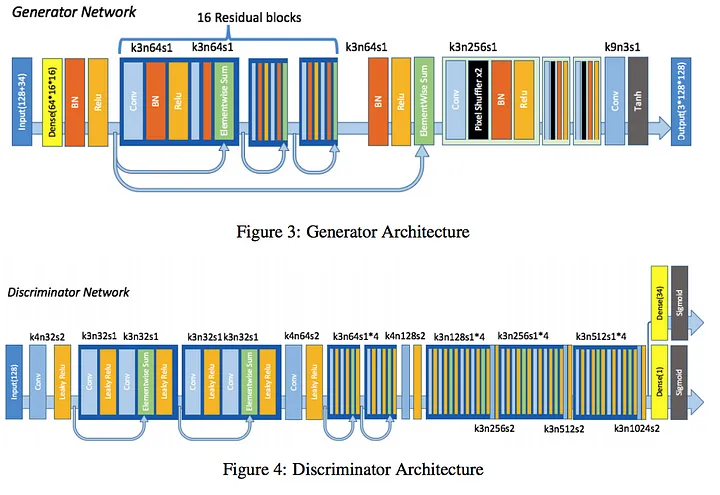

## Pose Guided Person Image Generation

With an additional input of the pose, we can transform an image into different poses. For example, the top right image is the ground truth while the bottom right is the generated image.

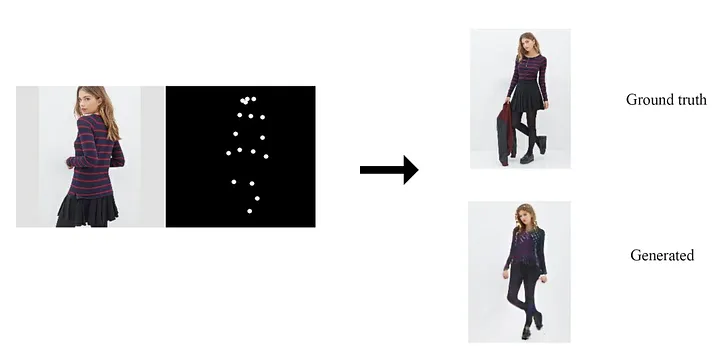

The refined result column below is the generated images.



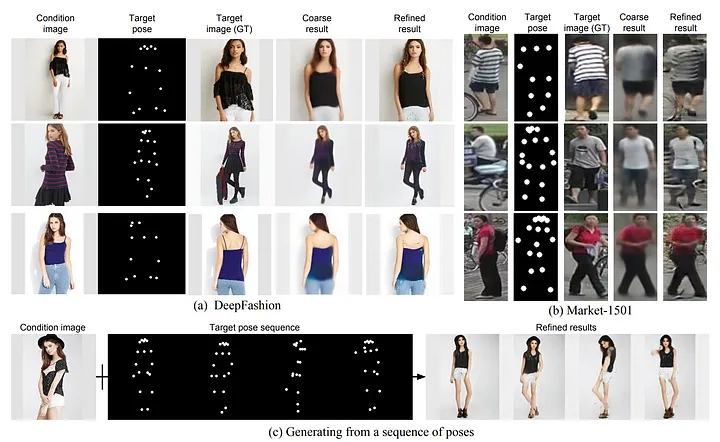

## CycleGAN

Cross-domain transfer GANs will be likely the first batch of commercial applications. These GANs transform images from one domain (say real scenery) to another domain (Monet paintings or Van Gogh).

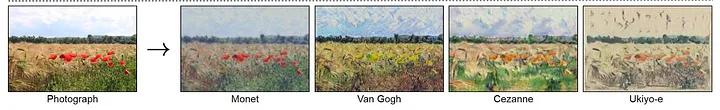

CycleGAN

For example, it can transform pictures between zebras and horses.



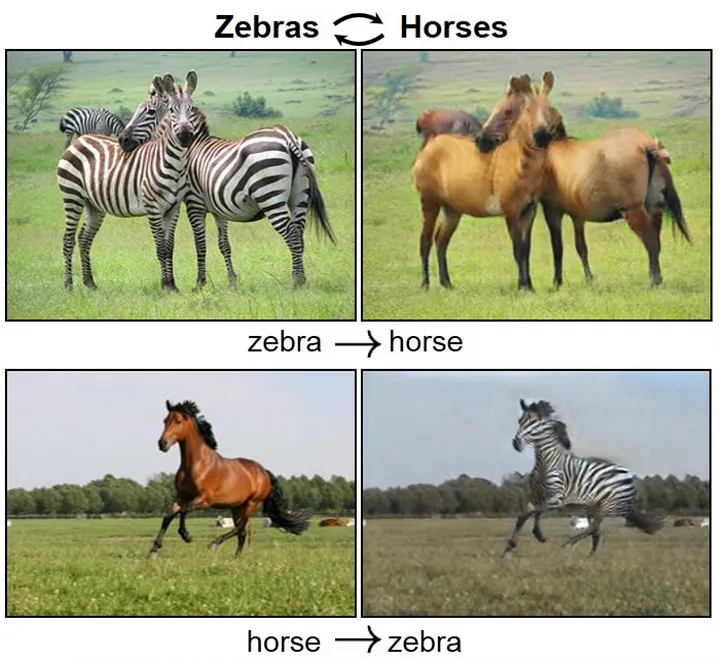

CycleGAN builds 2 networks G and F to construct images from one domain to another and in the reverse direction. It uses discriminators D to critic how well the generated images are. For example, G converts real images to Van Gogh style painting and Dy is used to distinguish whether the image is real or generated.

<a> Domain A ➝ Domain B:



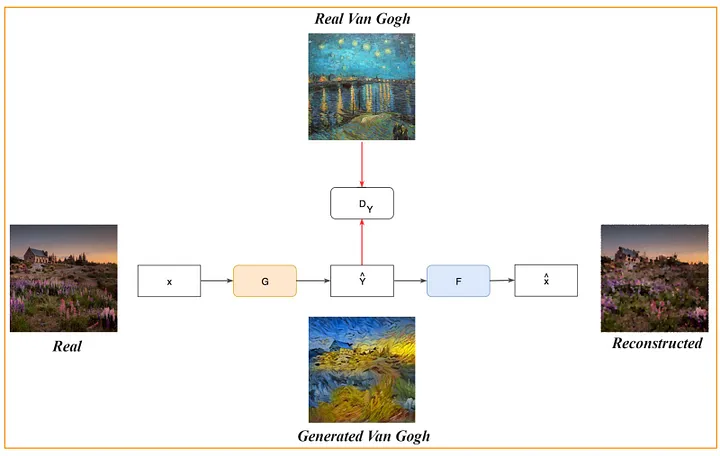

We repeat the process in the reverse direction Domain B➝ Domain A:



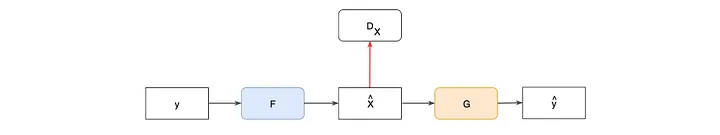

## StarGAN

StarGAN is an image-to-image translation for one domain to another. For example, given a happy face, we want to transform it into a fearful face.

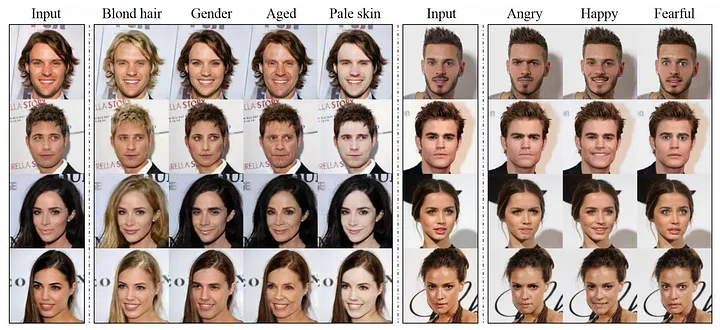

In (b), the generator generates a fake image based on an input image and a target domain label (say angry). In (c), given this fake image and the original domain of the image (say happy), it reconstructs the image using the generator. In (d), we feed real and fake images to the discriminator to label it as real or not as well as its domain classification. The cost function will involve reconstruction errors as well as the discriminator cost in identifying the images and their labels.



## StyleGAN2

### <a> StyleGAN2 generates high-resolution images.


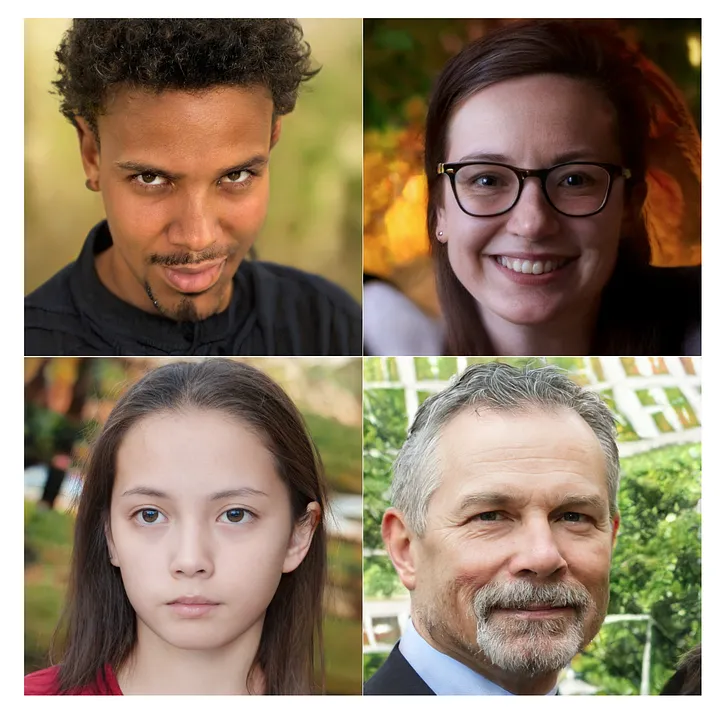

### Check this article for more details on the usecases

([More Usecase](https://jonathan-hui.medium.com/gan-some-cool-applications-of-gans-4c9ecca35900))


## <a> FAQs

<p> <a> **What is the difference between CNN vs. GAN? ** </a> Both Convolutional Neural Networks (CNNs) and Generative Adversarial Networks (GANs) are deep learning architectures. GANs are generative models that can generate new examples from a given training set, while convolutional neural networks (CNN) are primarily used for classification and recognition tasks. While a single CNN can also be used as a generative model if you set it up to be a Variational Autoencoder (VAE), CNNs are powerful tools for discriminative learning and are particularly suitable for classifying images in computer vision.  
Read more at: https://viso.ai/deep-learning/generative-adversarial-networks-gan/
</p>

<p> <a> **Discriminative Models vs. Generative Models The discriminative model**  </a>is a type of machine learning algorithm that is used to distinguish between different categories of data, for example, for image classification and object detection. A generative modeling algorithm, on the other hand, is used to generate new data that is similar to the data that was used to train the model. One of the key differences between generative and discriminative models is that a generative model can generate new examples, while a discriminative model can classify data. Another difference is that a generative model is typically more complex than a discriminative model. This is because a generative model needs to learn the underlying probability distribution of the data, while a discriminative model only needs to learn the mapping between inputs and outputs. The ultimate objective of discriminative models is to separate pre-defined and learned classes. If we have some outliers present in the dataset, then discriminative models work better compared to generative models i.e., discriminative models are more robust to outliers.
Read more at: https://viso.ai/deep-learning/generative-adversarial-networks-gan/
</p>

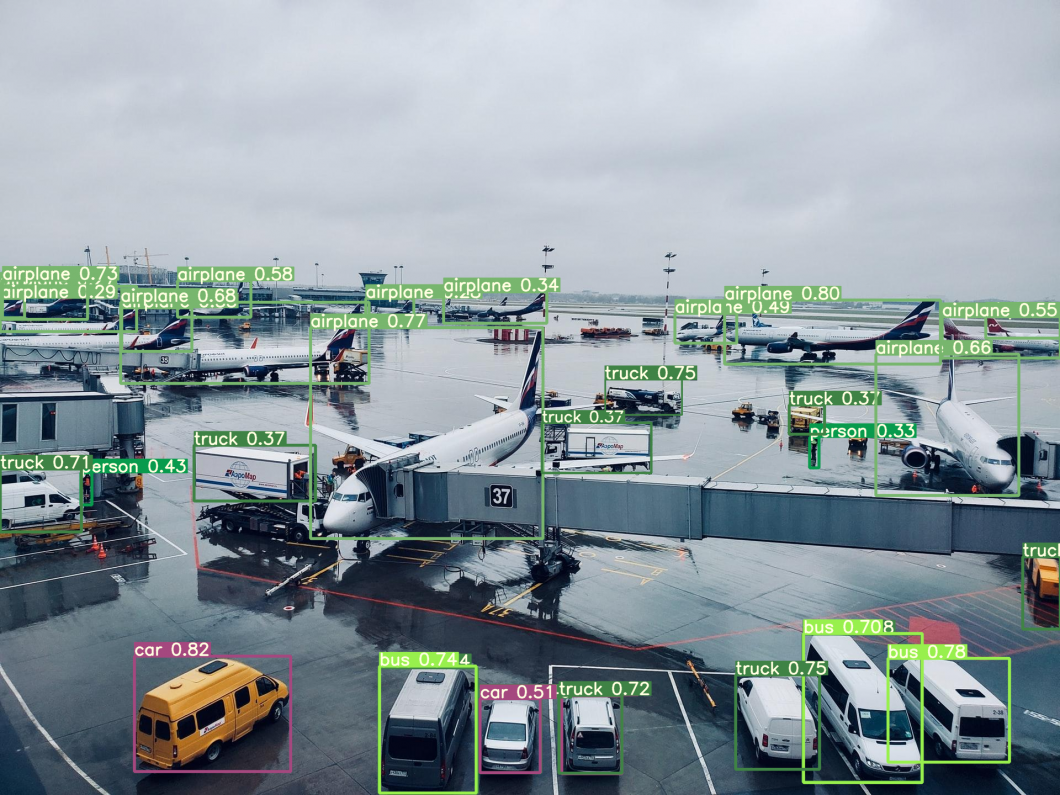

YOLOv7 deep learning detection in aviation – Viso Suite
Read more at: https://viso.ai/deep-learning/generative-adversarial-networks-gan/


<a> **The most popular applications of GANs?** </a> GANs can be used for a variety of AI tasks, such as machine learning based <a> image generation </a>, video generation, and text generation <a> (for example, in natural language processing, NLP)</a>. The major benefit of generative adversarial networks is that they can be used to create new data instances where <a> data collection</a> is difficult or impossible. Hence, GANs have been successfully applied in various practical applications in image synthesis and computer vision.  